# Analyse de données
**Problématique 1 :** Depuis un certain temps, la tranche 2 est limitée à 51 MW.

**Problématique 2 :** L'exploitation remonte une derive du coeficient "maître turbine" par rapport à la puissance produite par la tranche sur l'unité 2 de Prony Energies

In [18]:
# Bibliothèque(s)
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [19]:
# Input/Output
IMPORT_FOLDER = "C:\\Users\\e2884\\Desktop\\WPy64-3980\\notebooks\\202208_MaitreTurbineU2\\"
FILE = "20220817_ExtractionExaquantumBrute.xlsx"

In [20]:
# Excel sheet
xlfile = pd.ExcelFile(IMPORT_FOLDER + FILE)
#print(xlfile.sheet_names )

In [21]:
# Import xls in pandas
df_juin = pd.read_excel(IMPORT_FOLDER + FILE, sheet_name='Juin')
df_juillet = pd.read_excel(IMPORT_FOLDER + FILE, sheet_name='Juillet')

In [22]:
# Impression du label de chaque colonne
#print(df_juin.columns)

In [24]:
# Renomage des colonnes
df_juin = df_juin.rename(columns={'Root.02.GEV.02GEV-W-5110.PV': 'PUISSANCE_U2_MW'})
df_juin = df_juin.rename(columns={'Root.02.FRG.02FRG-TM-ML5.MV': 'MAITRE_TURBINE_PCT'})
df_juin = df_juin.rename(columns={'Root.02.GRE.02GRE-ZI-2600.PV': 'OUVERTURE_REGLANTE_PCT'})
#print(df_juin.columns)

df_juillet = df_juillet.rename(columns={'Root.02.GEV.02GEV-W-5110.PV': 'PUISSANCE_U2_MW'})
df_juillet = df_juillet.rename(columns={'Root.02.FRG.02FRG-TM-ML5.MV': 'MAITRE_TURBINE_PCT'})
df_juillet = df_juillet.rename(columns={'Root.02.GRE.02GRE-ZI-2600.PV': 'OUVERTURE_REGLANTE_PCT'})
df_juillet = df_juillet.rename(columns={'Root.02.VVP.02VVP-FT-3031C.PV': 'DEBIT_VAPEUR'})
df_juillet = df_juillet.rename(columns={'Root.02.FHA.02FHA-ZT-0870.PV': 'OUVERTURE_BYPASS_PCT'})


In [25]:
# Define date as datetime type
df_juin['TIME']=pd.to_datetime(df_juin['TIME'],unit='s')
df_juillet['TIME']=pd.to_datetime(df_juillet['TIME'],unit='s')
#print(df_juin['TIME'].dtypes)

In [26]:
# Filtre date
#df_juillet_1 = df_juillet[(df_juillet['TIME'] >= '2022-07-01 00:00:00') & (df_juillet['TIME'] < '2022-07-09 11:47:00')]
date = '2022-07-09 11:47:00'
#df_juillet = df_juillet[(df_juillet['PUISSANCE_U2_MW'] > 30)]
df_juillet_1 = df_juillet[(df_juillet['TIME'] < date)]
df_juillet_2 = df_juillet[(df_juillet['TIME'] >= date)]

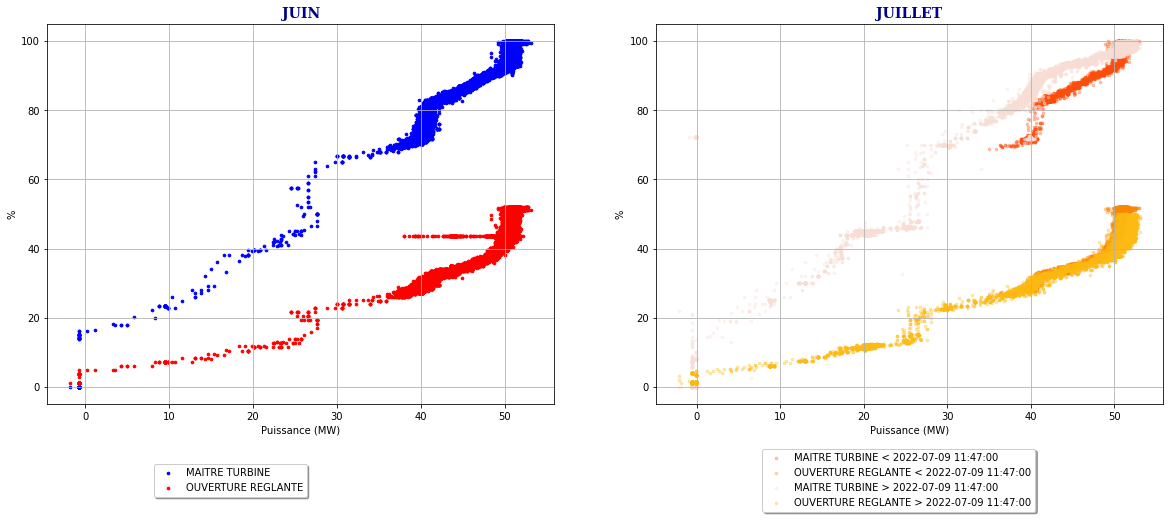

In [27]:
# Graphique
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

axes[0].set_title("JUIN", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[0].set_xlabel("Puissance (MW)", size = 10,)
axes[0].set_ylabel("%", size = 10,)
axes[0].scatter(df_juin.PUISSANCE_U2_MW, df_juin.MAITRE_TURBINE_PCT,7,'b','o',label="MAITRE TURBINE")
axes[0].scatter(df_juin.PUISSANCE_U2_MW, df_juin.OUVERTURE_REGLANTE_PCT,7,'r','o',label="OUVERTURE REGLANTE")
axes[0].grid(True)
axes[0].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

axes[1].set_title("JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[1].set_xlabel("Puissance (MW)", size = 10,)
axes[1].set_ylabel("%", size = 10,)
axes[1].scatter(df_juillet_1.PUISSANCE_U2_MW, df_juillet_1.MAITRE_TURBINE_PCT,7,color="#FD4D0C", marker='o',alpha=0.3,label="MAITRE TURBINE < {}".format(date))
axes[1].scatter(df_juillet_1.PUISSANCE_U2_MW, df_juillet_1.OUVERTURE_REGLANTE_PCT,7,color="#FB8604", marker='o',alpha=0.3,label="OUVERTURE REGLANTE < {}".format(date))
axes[1].scatter(df_juillet_2.PUISSANCE_U2_MW, df_juillet_2.MAITRE_TURBINE_PCT,7,color="#F7DDD4", marker='o',alpha=0.3,label="MAITRE TURBINE > {}".format(date))
axes[1].scatter(df_juillet_2.PUISSANCE_U2_MW, df_juillet_2.OUVERTURE_REGLANTE_PCT,7,color="#FCBA12", marker='o',alpha=0.3,label="OUVERTURE REGLANTE > {}".format(date))
axes[1].grid(True)
axes[1].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)


#Export
#fig.savefig('export.png', bbox_inches='tight',dpi=300)


## Graphique 1 
Ci-dessus pour les mois de juin/juillet 2022, le maître turbine (MT) et l'ouverture de la réglante (OR) en fonction de la puissance.
Pour le mois de juillet les données avant et après le BO sont séparée.
**Observations :**
- Pour certaines puissances, les plages du MT et de OR sont plus grandes (50, 40, 36 MW). Pourquoi ? Ces plages ne sont pas proportionnelles entre le MT et l'OR.
- En juillet on observe une dérive du MT avant et après le BO pour une même gamme d'OR. 
- L'OR est un peu moins elevée après le BO.

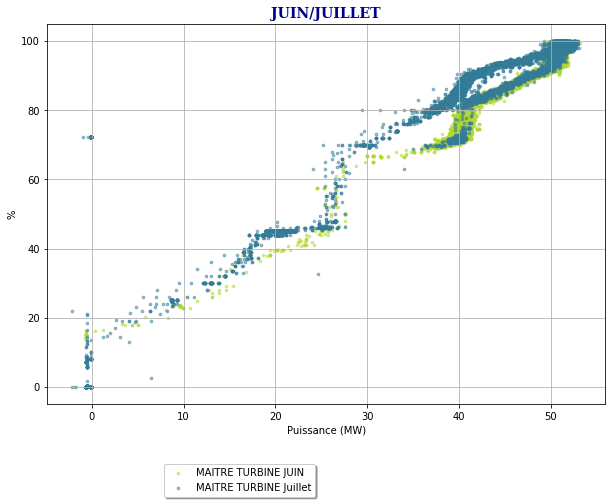

In [28]:
# Graphique
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

axes.set_title("JUIN/JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes.set_xlabel("Puissance (MW)", size = 10,)
axes.set_ylabel("%", size = 10,)
axes.scatter(df_juin.PUISSANCE_U2_MW, df_juin.MAITRE_TURBINE_PCT,7,color="#B2D732", marker='o',alpha=0.5,label="MAITRE TURBINE JUIN")
axes.scatter(df_juillet.PUISSANCE_U2_MW, df_juillet.MAITRE_TURBINE_PCT,7,color="#347B98", marker='o',alpha=0.5,label="MAITRE TURBINE Juillet")
axes.grid(True)
axes.legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

## Graphique 2
Lorsqu'on superpose le MT JUIN & JUILLET on observe que la dérive est plus notable entre 27 et 40 MW.

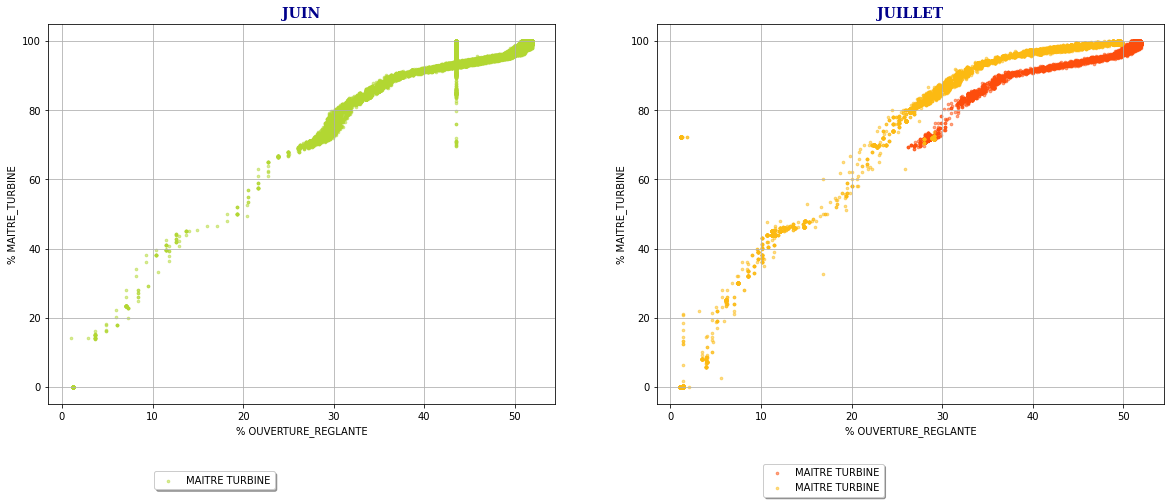

In [29]:
# Graphique
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

axes[0].set_title("JUIN", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[0].set_xlabel("% OUVERTURE_REGLANTE", size = 10,)
axes[0].set_ylabel("% MAITRE_TURBINE", size = 10,)
axes[0].scatter(df_juin.OUVERTURE_REGLANTE_PCT, df_juin.MAITRE_TURBINE_PCT,7,color="#B2D732", marker='o',alpha=0.5,label="MAITRE TURBINE")
axes[0].grid(True)
axes[0].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

axes[1].set_title("JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[1].set_xlabel("% OUVERTURE_REGLANTE", size = 10,)
axes[1].set_ylabel("% MAITRE_TURBINE", size = 10,)
axes[1].scatter(df_juillet_1.OUVERTURE_REGLANTE_PCT, df_juillet_1.MAITRE_TURBINE_PCT,7,color="#FD4D0C", marker='o',alpha=0.5,label="MAITRE TURBINE")
axes[1].scatter(df_juillet_2.OUVERTURE_REGLANTE_PCT, df_juillet_2.MAITRE_TURBINE_PCT,7,color="#FCBA12", marker='o',alpha=0.5,label="MAITRE TURBINE")
axes[1].grid(True)
axes[1].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

## Graphique 3 
Ci-dessus, les graphes JUIN/JUILLET du MT en fonction de l'ouverture de la reglante confirmant la dérive. Pour une même puissance c'est à dire une même ouverture de réglante le MT est plus élevé.

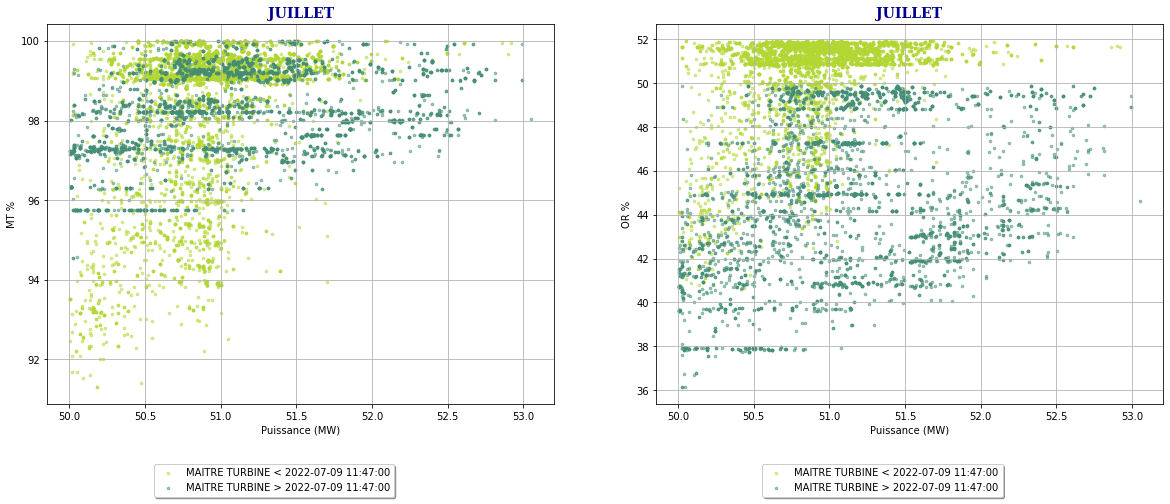

In [30]:
# Filtre date
df_juillet_MW = df_juillet[(df_juillet['PUISSANCE_U2_MW'] > 50)]
date = '2022-07-09 11:47:00'
df_juillet_MW_1 = df_juillet_MW[(df_juillet_MW['TIME'] < date)]
df_juillet_MW_2 = df_juillet_MW[(df_juillet_MW['TIME'] >= date)]

# Graphique
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

axes[0].set_title("JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[0].set_xlabel("Puissance (MW)", size = 10,)
axes[0].set_ylabel("MT %", size = 10,)
axes[0].scatter(df_juillet_MW_1.PUISSANCE_U2_MW, df_juillet_MW_1.MAITRE_TURBINE_PCT,7,color="#B2D732", marker='o',alpha=0.5,label="MAITRE TURBINE < {}".format(date))
axes[0].scatter(df_juillet_MW_2.PUISSANCE_U2_MW, df_juillet_MW_2.MAITRE_TURBINE_PCT,7,color="#448D76", marker='o',alpha=0.5,label="MAITRE TURBINE > {}".format(date))
axes[0].grid(True)
axes[0].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

axes[1].set_title("JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[1].set_xlabel("Puissance (MW)", size = 10,)
axes[1].set_ylabel("OR %", size = 10,)
axes[1].scatter(df_juillet_MW_1.PUISSANCE_U2_MW, df_juillet_MW_1.OUVERTURE_REGLANTE_PCT,7,color="#B2D732", marker='o',alpha=0.5,label="MAITRE TURBINE < {}".format(date))
axes[1].scatter(df_juillet_MW_2.PUISSANCE_U2_MW, df_juillet_MW_2.OUVERTURE_REGLANTE_PCT,7,color="#448D76", marker='o',alpha=0.5,label="MAITRE TURBINE > {}".format(date))
axes[1].grid(True)
axes[1].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

## Graphique 4
Sur les graphes ci-dessus, on observe qu'avant et après le BO du 9/7 on ne dépasse que très rarement les 51,5 MW.
Après le BO, l'ouverture de la vanne reglante ne dépasse pas 50%.

Il faut regarder le débit entrée turbine / avant et après la limitation.

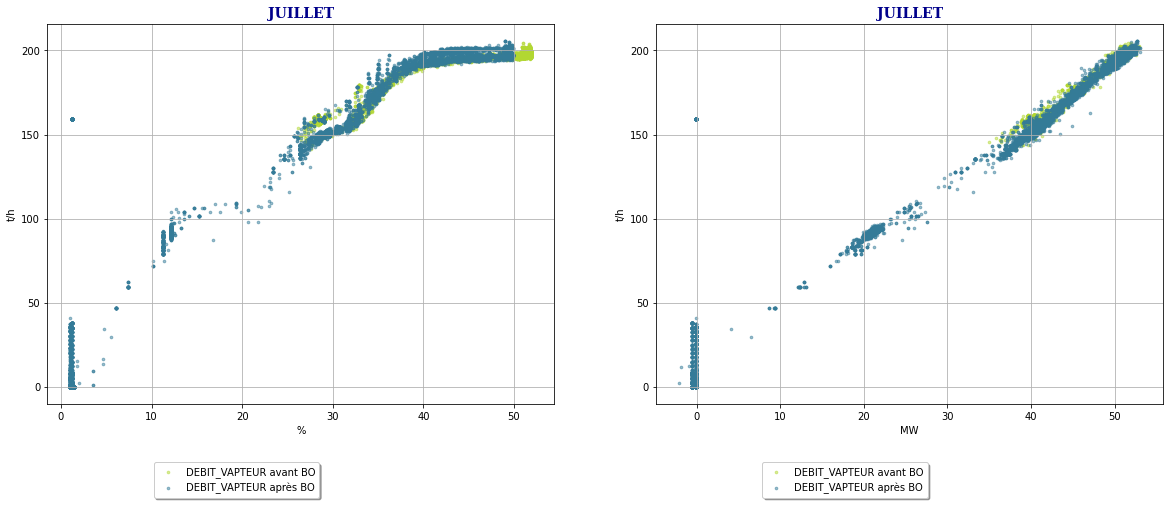

In [36]:
# Filtre date
df_juillet_BP= df_juillet[(df_juillet['OUVERTURE_BYPASS_PCT'] < 1)]
date = '2022-07-09 11:47:00'
df_juillet_BP_1 = df_juillet_BP[(df_juillet_BP['TIME'] < date)]
df_juillet_BP_2 = df_juillet_BP[(df_juillet_BP['TIME'] >= date)]

# Graphique
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

axes[0].set_title("JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[0].set_xlabel("%", size = 10,)
axes[0].set_ylabel("t/h", size = 10,)
axes[0].scatter(df_juillet_BP_1.OUVERTURE_REGLANTE_PCT, df_juillet_BP_1.DEBIT_VAPEUR,7,color="#B2D732", marker='o',alpha=0.5,label="DEBIT_VAPTEUR avant BO")
axes[0].scatter(df_juillet_BP_2.OUVERTURE_REGLANTE_PCT, df_juillet_BP_2.DEBIT_VAPEUR,7,color="#347B98", marker='o',alpha=0.5,label="DEBIT_VAPTEUR après BO")
axes[0].grid(True)
axes[0].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

axes[1].set_title("JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[1].set_xlabel("MW", size = 10,)
axes[1].set_ylabel("t/h", size = 10,)
axes[1].scatter(df_juillet_BP_1.PUISSANCE_U2_MW, df_juillet_BP_1.DEBIT_VAPEUR,7,color="#B2D732", marker='o',alpha=0.5,label="DEBIT_VAPTEUR avant BO")
axes[1].scatter(df_juillet_BP_2.PUISSANCE_U2_MW, df_juillet_BP_2.DEBIT_VAPEUR,7,color="#347B98", marker='o',alpha=0.5,label="DEBIT_VAPTEUR après BO")
axes[1].grid(True)
axes[1].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

## Graphique 6
Le débit produit à la chaudière est proportionel à la puissance (on pouvait s'en douter)
Entre 40 et 50 % d'OR le débit produit à la chaudière est sensiblement le même. QUid de la pression ? 

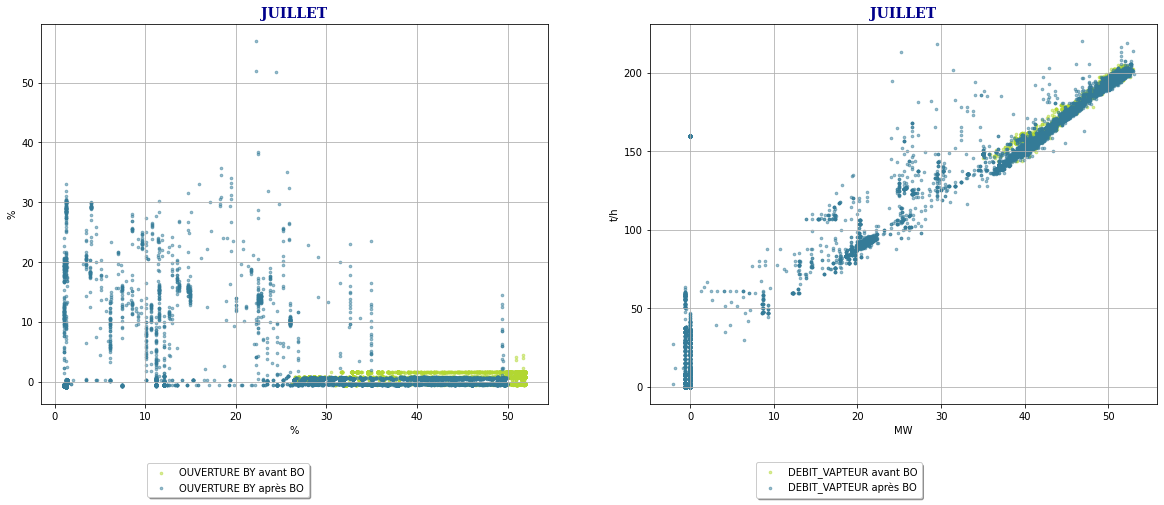

In [39]:
# Filtre date
date = '2022-07-09 11:47:00'
df_juillet_1 = df_juillet[(df_juillet['TIME'] < date)]
df_juillet_2 = df_juillet[(df_juillet['TIME'] >= date)]

# Graphique
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

axes[0].set_title("JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[0].set_xlabel("%", size = 10,)
axes[0].set_ylabel("%", size = 10,)
axes[0].scatter(df_juillet_1.OUVERTURE_REGLANTE_PCT, df_juillet_1.OUVERTURE_BYPASS_PCT,7,color="#B2D732", marker='o',alpha=0.5,label="OUVERTURE BY avant BO")
axes[0].scatter(df_juillet_2.OUVERTURE_REGLANTE_PCT, df_juillet_2.OUVERTURE_BYPASS_PCT,7,color="#347B98", marker='o',alpha=0.5,label="OUVERTURE BY après BO")
axes[0].grid(True)
axes[0].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

axes[1].set_title("JUILLET", fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes[1].set_xlabel("MW", size = 10,)
axes[1].set_ylabel("t/h", size = 10,)
axes[1].scatter(df_juillet_1.PUISSANCE_U2_MW, df_juillet_1.DEBIT_VAPEUR,7,color="#B2D732", marker='o',alpha=0.5,label="DEBIT_VAPTEUR avant BO")
axes[1].scatter(df_juillet_2.PUISSANCE_U2_MW, df_juillet_2.DEBIT_VAPEUR,7,color="#347B98", marker='o',alpha=0.5,label="DEBIT_VAPTEUR après BO")
axes[1].grid(True)
axes[1].legend(loc="center left",bbox_to_anchor=(0.2, -0.2), ncol=1, fancybox=True, shadow=True)

## Graphique 7
Entre 40 et 50 % d'OR le bypass n'est pas plus ouvert que ça. 